<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px">

## Plotting timeseries and trendlines

Week 9 | Lesson 2.1.1

---

We will practice timeseries data in the context of pandas DataFrames. There are definitely oddities of how these are handled in pandas (it's not very graceful). So it is useful to get a feel for this and practice it.

We will be using a simple google trends dataset for website hits on mapquest.

---

**Load the mapquest dataset:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
# Import the data
df = pd.read_csv('../../assets/datasets/mapquest_google_trends.csv')
df.columns = ['week','hits']

In [9]:
df.head(3)


,week,hits
0,2004-01-04,53
1,2004-01-11,53
2,2004-01-18,54


In [7]:
df.dtypes

WeekOf      object
mapquest     int64
dtype: object

---

**Plot the hits for the mapquest data, using pandas' `.plot()` functionality:**

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

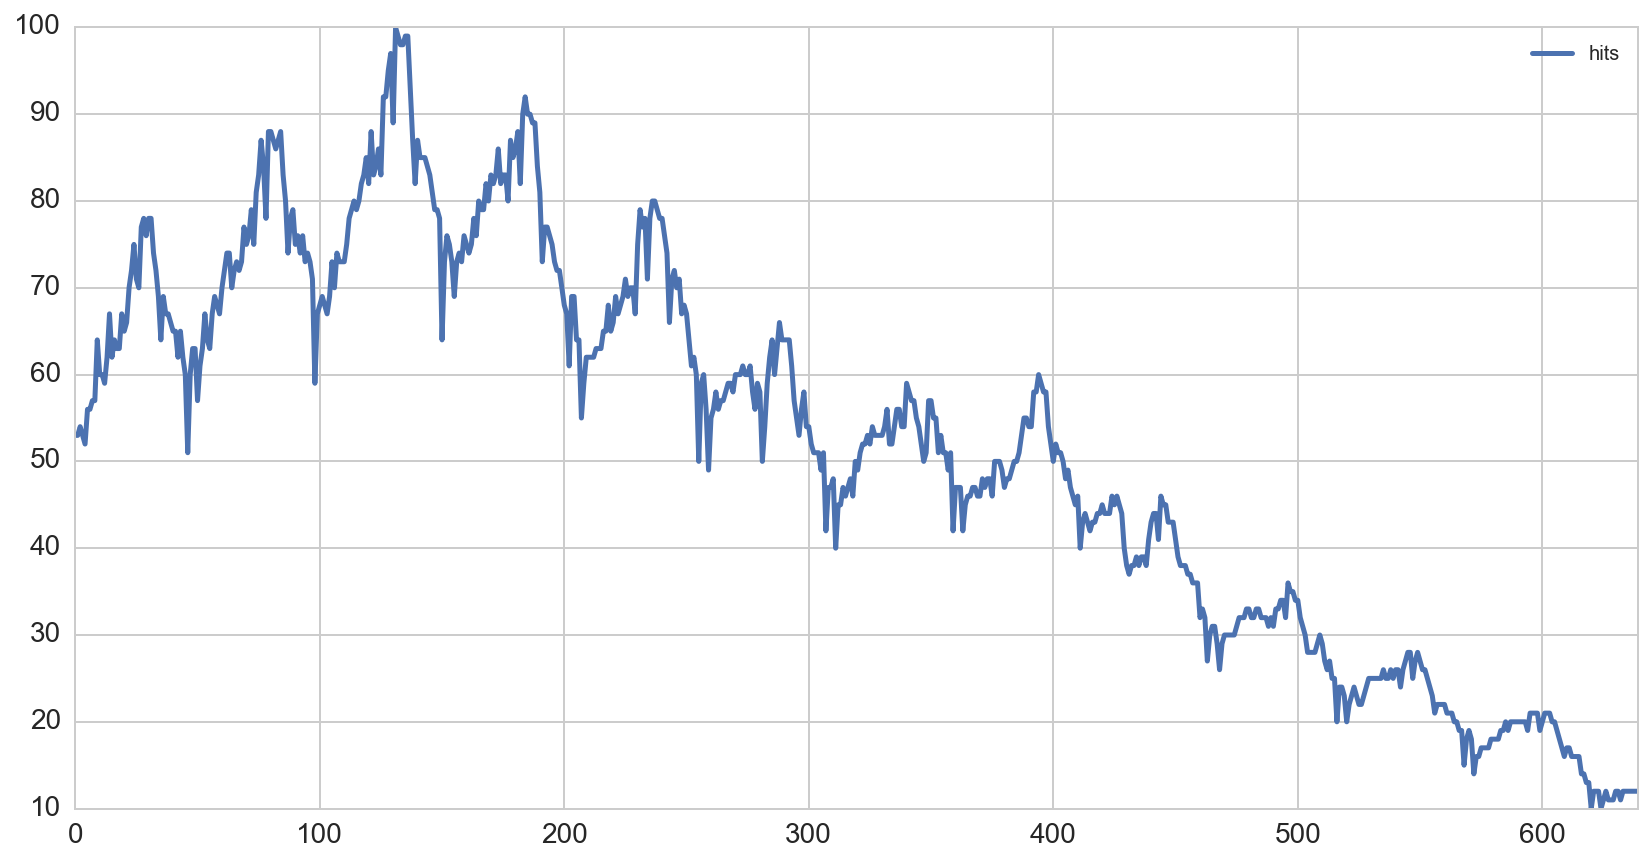

In [31]:
df.plot(figsize=(14,7), lw=2.5, fontsize=14)

---

**Use pandas `to_datetime()` to convert the date column:**

In [18]:
df.week.values[0]

'2004-01-04'

In [20]:
df.week = pd.to_datetime(df.week)

---

**Access time components using the pandas Series `dt` attribute to create date "ticks" for a plot:**

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html

In [47]:
date_ticks = df.week.dt.to_pydatetime()
print date_ticks[0:3]

[datetime.datetime(2004, 1, 4, 0, 0) datetime.datetime(2004, 1, 11, 0, 0)
 datetime.datetime(2004, 1, 18, 0, 0)]


---

**Plot the hits using the date ticks for the x-axis:**

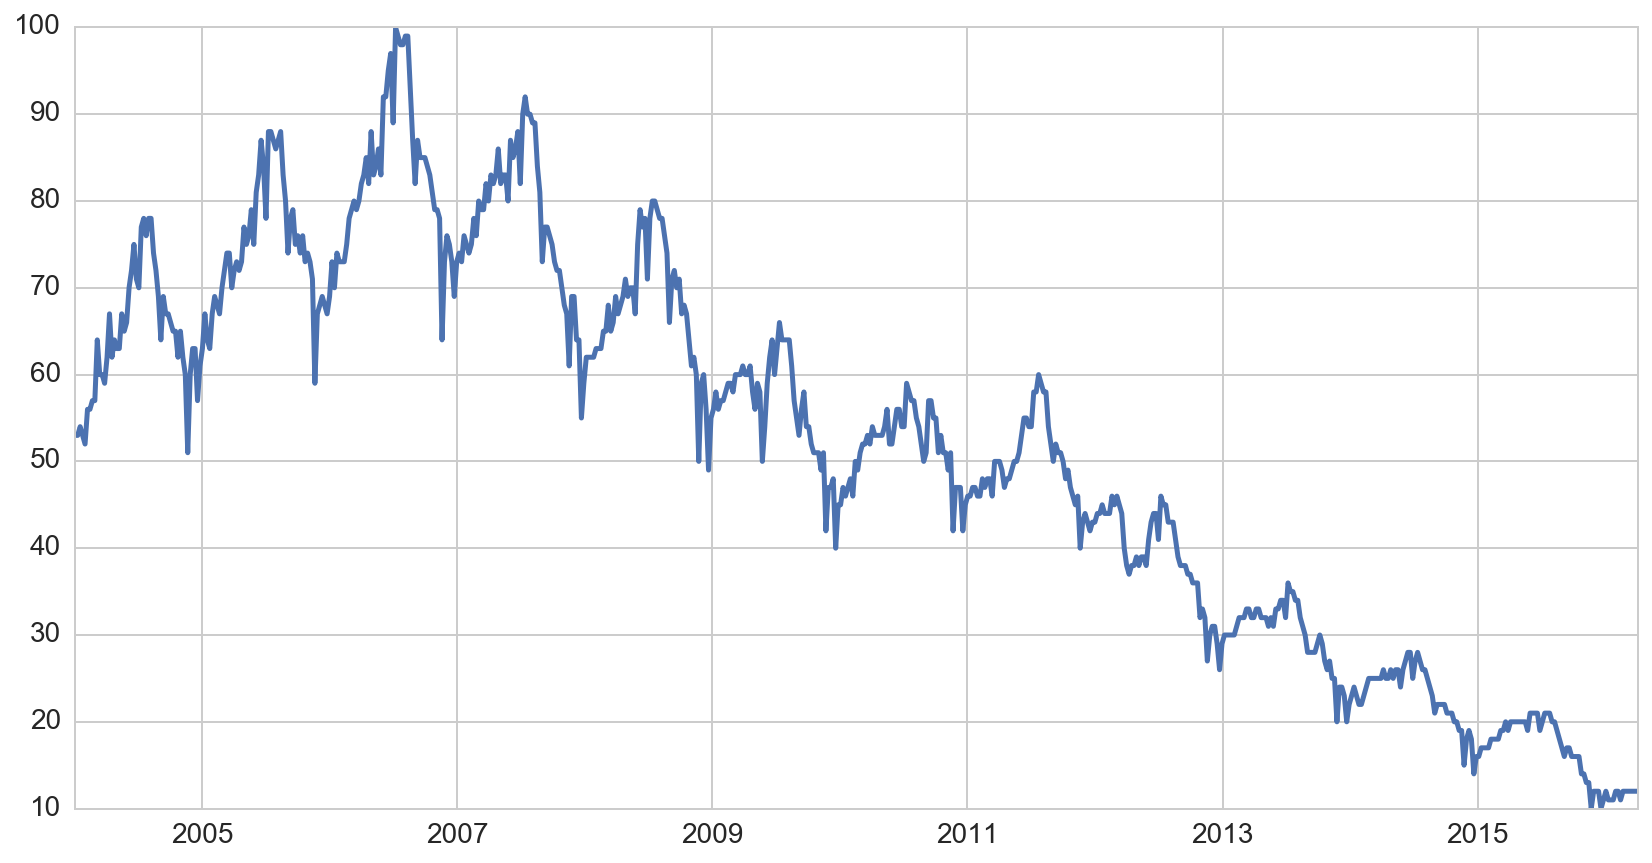

In [48]:
plt.figure(figsize=(14,7))
plt.plot(date_ticks, df.hits, lw=2.5)
plt.tick_params(labelsize=14)

---

## Scipy `polyfit` and numpy `poly1d`

Scipy's functions `.polyfit()` and numpy's `.poly1d` can be used to easily plot regression lines for timeseries.

First you have to create the coefficients of the regression line using `.polyfit()`, then use numpy's `.poly1d()` to create a function that will calculate y-values using the coefficients.

http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html

http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.poly1d.html

---

**Create a "degree 1" (intercept and x) regression fit and function for the hits:

In [38]:
hit_points = np.arange(0,df.shape[0])

line_coef = np.polyfit(hit_points, df.hits, deg=1)

# coeffiecients returned have highest power first (intercept is last, lowest power).
print line_coef

[ -0.10841388  86.58979622]


In [39]:
polynomial = np.poly1d(line_coef)

---

**Plot the regression line through the timeseries hits data:**

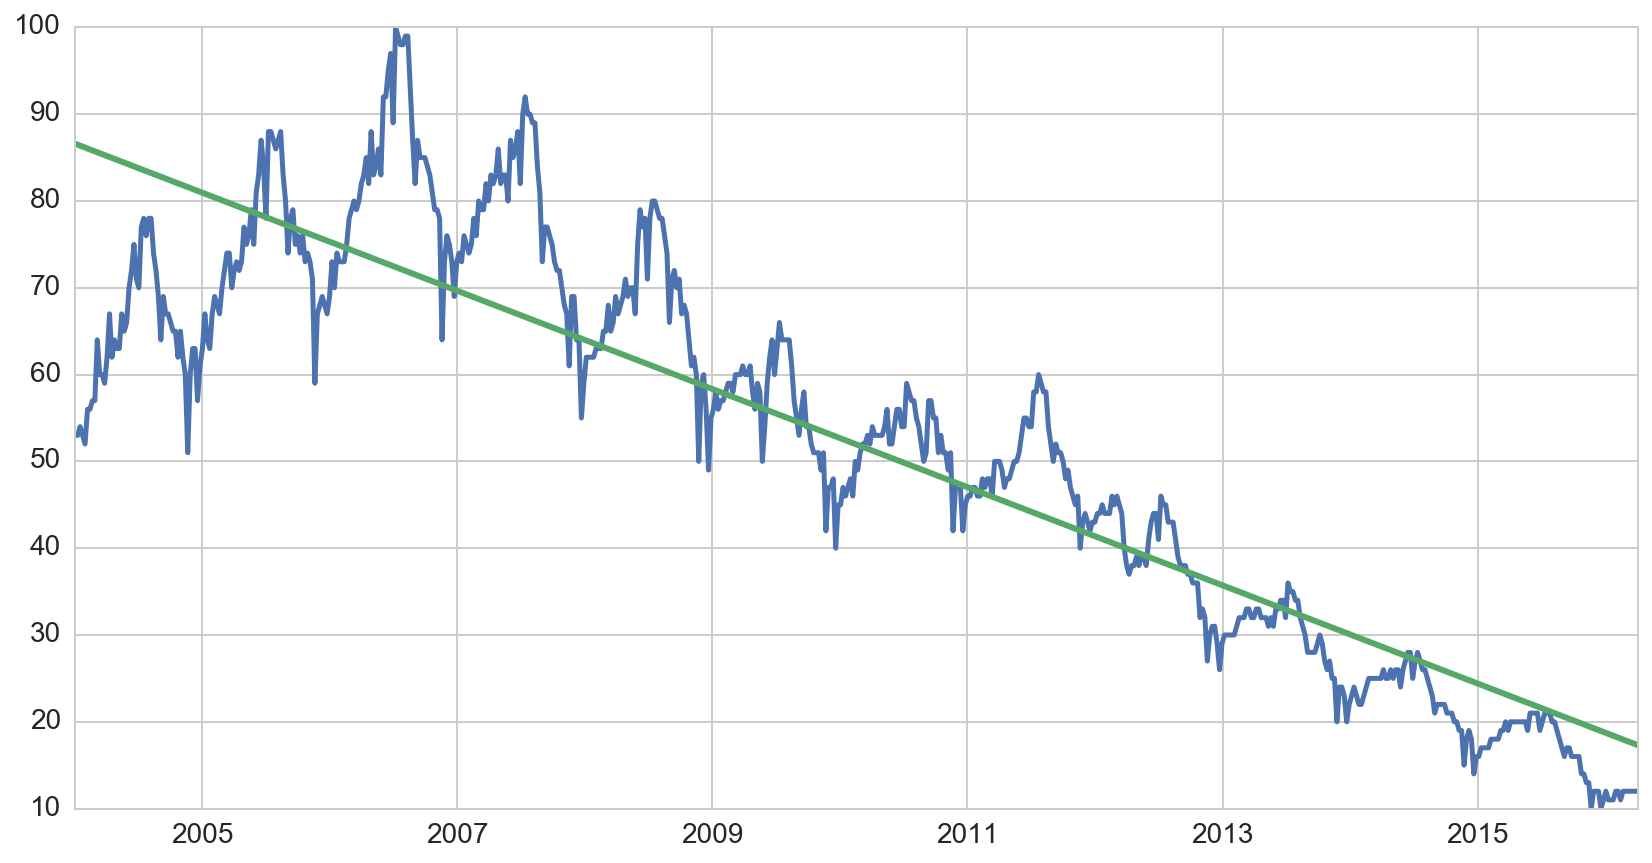

In [49]:
plt.figure(figsize=(14,7))
plt.plot(date_ticks, df.hits, lw=2.5)
plt.plot(date_ticks, polynomial(hit_points), lw=3)
plt.tick_params(labelsize=14)

---

**Create degree 1,2, and 3 regression functions, and plot them together:**

In [51]:
p1_line_coef = np.polyfit(hit_points, df.hits, deg=1)
p2_line_coef = np.polyfit(hit_points, df.hits, deg=2)
p3_line_coef = np.polyfit(hit_points, df.hits, deg=3)

p1_poly = np.poly1d(p1_line_coef)
p2_poly = np.poly1d(p2_line_coef)
p3_poly = np.poly1d(p3_line_coef)

# coeffiecients returned have highest power first (intercept is last, lowest power).
print p1_line_coef
print p2_line_coef
print p3_line_coef

[ -0.10841388  86.58979622]
[ -1.84964781e-04   9.77861827e-03   7.40219942e+01]
[  8.75948930e-07  -1.02456183e-03   2.24211880e-01   6.26480849e+01]


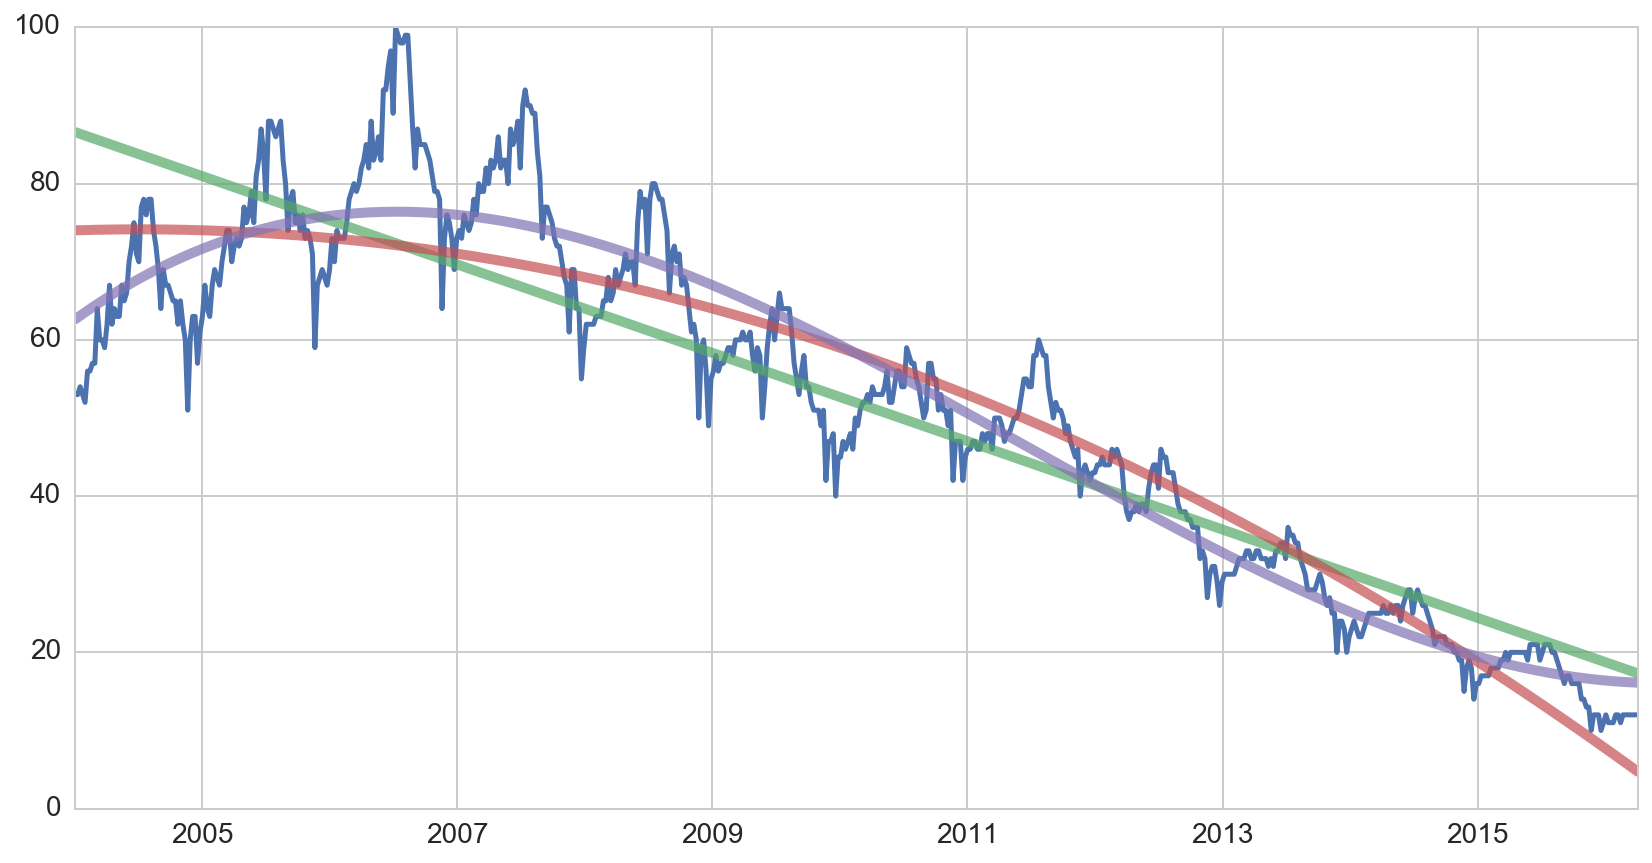

In [54]:
plt.figure(figsize=(14,7))
plt.plot(date_ticks, df.hits, lw=2.5)
plt.plot(date_ticks, p1_poly(hit_points), lw=5, alpha=0.7)
plt.plot(date_ticks, p2_poly(hit_points), lw=5, alpha=0.7)
plt.plot(date_ticks, p3_poly(hit_points), lw=5, alpha=0.7)
plt.tick_params(labelsize=14)